# NYC Taxi Trip Data - Data Cleaning and Preprocessing

## Module 4: Preparing Clean Data for Machine Learning

**Goal:** Remove invalid data, handle outliers, and create target variables

**Date:** February 2026

**Input:** Raw data from `data/raw/yellow_tripdata_2025-01.parquet`  
**Output:** Clean data saved to `data/processed/taxi_cleaned.parquet`

In [15]:
# ============================================
# IMPORT LIBRARIES
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [16]:
# ============================================
# LOAD RAW DATA
# ============================================

# Load the original data
file_path = r"C:\Users\hunda\OneDrive\Documents\GitHub\group-project-avengers\data\raw\yellow_tripdata_2025-01.parquet"

print("📂 Loading data...")
df = pd.read_parquet(file_path)

print(f"✅ Data loaded successfully!")
print(f"✅ Initial dataset: {len(df):,} trips")
print(f"✅ Columns: {len(df.columns)}")

📂 Loading data...
✅ Data loaded successfully!
✅ Initial dataset: 3,475,226 trips
✅ Columns: 20


In [17]:
# ============================================
# STEP 1A: CALCULATE TRIP DURATION (TARGET VARIABLE)
# ============================================

print("="*70)
print("STEP 1A: CALCULATING TRIP DURATION")
print("="*70)

# Calculate duration in minutes
# Formula: dropoff time - pickup time, convert to minutes
df['trip_duration_min'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60

# Check results
print(f"\n✅ Trip duration calculated!")
print(f"   Mean duration: {df['trip_duration_min'].mean():.2f} minutes")
print(f"   Median duration: {df['trip_duration_min'].median():.2f} minutes")
print(f"   Min duration: {df['trip_duration_min'].min():.2f} minutes")
print(f"   Max duration: {df['trip_duration_min'].max():.2f} minutes")

# Check for negative or zero durations (data errors!)
negative_duration = len(df[df['trip_duration_min'] <= 0])
print(f"\n⚠️  Trips with negative/zero duration: {negative_duration:,}")

STEP 1A: CALCULATING TRIP DURATION

✅ Trip duration calculated!
   Mean duration: 15.02 minutes
   Median duration: 11.70 minutes
   Min duration: -51472.32 minutes
   Max duration: 5626.32 minutes

⚠️  Trips with negative/zero duration: 2,051


In [18]:
# ============================================
# STEP 1B: FILTER TO POST-CONGESTION PRICING DATES
# ============================================
print("="*70)
print("STEP 1B: FILTERING TO JANUARY 5-31, 2025")
print("="*70)

before_count = len(df)

df = df[(df['tpep_pickup_datetime'] >= '2025-01-05') & 
        (df['tpep_pickup_datetime'] < '2025-02-01')]

after_count = len(df)
removed = before_count - after_count
print(f"✅ Removed {removed:,} trips outside Jan 5-31, 2025")
print(f"   Kept: {after_count:,} trips")

STEP 1B: FILTERING TO JANUARY 5-31, 2025
✅ Removed 364,096 trips outside Jan 5-31, 2025
   Kept: 3,111,130 trips


In [19]:
# ============================================
# STEP 2: REMOVE INVALID TRIP DURATIONS
# ============================================

print("="*70)
print("STEP 2: REMOVING INVALID DURATIONS")
print("="*70)

# Before
before_count = len(df)

# Remove trips with duration <= 1 or > 180 minutes (3 hours)
df = df[(df['trip_duration_min'] >= 1) & (df['trip_duration_min'] <= 180)]

# After
after_count = len(df)
removed = before_count - after_count

print(f"✅ Removed {removed:,} trips with invalid durations")
print(f"   Kept: {after_count:,} trips")
print(f"   New duration range: {df['trip_duration_min'].min():.2f} to {df['trip_duration_min'].max():.2f} minutes")

STEP 2: REMOVING INVALID DURATIONS
✅ Removed 35,899 trips with invalid durations
   Kept: 3,075,231 trips
   New duration range: 1.00 to 179.05 minutes


In [20]:
# ============================================
# STEP 3A: REMOVE INVALID PASSENGER COUNTS
# ============================================

print("="*70)
print("STEP 3A: REMOVING INVALID PASSENGER COUNTS")
print("="*70)

# Before
before_count = len(df)

# Check current distribution
print("\nPassenger count distribution BEFORE cleaning:")
print(df['passenger_count'].value_counts().sort_index())

# Remove trips with 0 passengers or more than 6 passengers
# Standard NYC taxis hold maximum 4-5 passengers, 6 is generous limit
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

# After
after_count = len(df)
removed = before_count - after_count

print(f"\n✅ Removed {removed:,} trips with invalid passenger counts")
print(f"   Kept: {after_count:,} trips")

print("\nPassenger count distribution AFTER cleaning:")
print(df['passenger_count'].value_counts().sort_index())

STEP 3A: REMOVING INVALID PASSENGER COUNTS

Passenger count distribution BEFORE cleaning:
passenger_count
0.00      21438
1.00    2061687
2.00     342558
3.00      72085
4.00      40920
5.00      15330
6.00      10431
7.00          1
8.00          5
9.00          1
Name: count, dtype: int64

✅ Removed 532,220 trips with invalid passenger counts
   Kept: 2,543,011 trips

Passenger count distribution AFTER cleaning:
passenger_count
1.00    2061687
2.00     342558
3.00      72085
4.00      40920
5.00      15330
6.00      10431
Name: count, dtype: int64


In [21]:
# ============================================
# STEP 3B: CLEAN RATECODE ID
# ============================================
print("="*70)
print("STEP 3B: CLEANING RATECODE ID")
print("="*70)

before_count = len(df)

print(f"\nRatecodeID distribution BEFORE cleaning:")
print(df['RatecodeID'].value_counts().sort_index())

df = df[(df['RatecodeID'] >= 1) & (df['RatecodeID'] <= 6)]

after_count = len(df)
removed = before_count - after_count
print(f"\n✅ Removed {removed:,} trips with invalid RatecodeID")
print(f"   Kept: {after_count:,} trips")


STEP 3B: CLEANING RATECODE ID

RatecodeID distribution BEFORE cleaning:
RatecodeID
1.00     2405582
2.00       76055
3.00        6369
4.00        6012
5.00       11587
6.00           1
99.00      37405
Name: count, dtype: int64

✅ Removed 37,405 trips with invalid RatecodeID
   Kept: 2,505,606 trips


In [22]:
# ============================================
# STEP 4: REMOVE DISTANCE OUTLIERS
# ============================================

print("="*70)
print("STEP 4: REMOVING DISTANCE OUTLIERS")
print("="*70)

# Before
before_count = len(df)

# Check current range
print(f"Distance range BEFORE cleaning:")
print(f"   Min: {df['trip_distance'].min():.2f} miles")
print(f"   Max: {df['trip_distance'].max():.2f} miles")

# Remove trips with distance <= 0 or > 100 miles
# NYC area trips realistically don't exceed 100 miles
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]

# After
after_count = len(df)
removed = before_count - after_count

print(f"\n✅ Removed {removed:,} trips with invalid distances")
print(f"   Kept: {after_count:,} trips")

print(f"\nDistance range AFTER cleaning:")
print(f"   Min: {df['trip_distance'].min():.2f} miles")
print(f"   Max: {df['trip_distance'].max():.2f} miles")
print(f"   Mean: {df['trip_distance'].mean():.2f} miles")


STEP 4: REMOVING DISTANCE OUTLIERS
Distance range BEFORE cleaning:
   Min: 0.00 miles
   Max: 4020.04 miles

✅ Removed 9,615 trips with invalid distances
   Kept: 2,495,991 trips

Distance range AFTER cleaning:
   Min: 0.01 miles
   Max: 96.37 miles
   Mean: 3.08 miles


In [23]:
# ============================================
# STEP 5: REMOVE FARE OUTLIERS
# ============================================

print("="*70)
print("STEP 5: REMOVING FARE OUTLIERS")
print("="*70)

# Before
before_count = len(df)

# Check current range
print(f"Fare range BEFORE cleaning:")
print(f"   Min: ${df['fare_amount'].min():.2f}")
print(f"   Max: ${df['fare_amount'].max():,.2f}")

# Remove negative fares and extreme outliers (> $500)
# Typical NYC taxi fares are $10-100, $500 is generous limit
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 500)]

# Also clean total_amount
df = df[(df['total_amount'] > 0) & (df['total_amount'] <= 600)]

# After
after_count = len(df)
removed = before_count - after_count

print(f"\n✅ Removed {removed:,} trips with invalid fares")
print(f"   Kept: {after_count:,} trips")

print(f"\nFare range AFTER cleaning:")
print(f"   Min: ${df['fare_amount'].min():.2f}")
print(f"   Max: ${df['fare_amount'].max():.2f}")
print(f"   Mean: ${df['fare_amount'].mean():.2f}")


STEP 5: REMOVING FARE OUTLIERS
Fare range BEFORE cleaning:
   Min: $-900.00
   Max: $863,372.12

✅ Removed 44,888 trips with invalid fares
   Kept: 2,451,103 trips

Fare range AFTER cleaning:
   Min: $0.01
   Max: $483.00
   Mean: $17.45


In [24]:
# ============================================
# STEP 6: CREATE TARGET VARIABLES FOR ML
# ============================================

print("="*70)
print("STEP 6: CREATING TARGET VARIABLES")
print("="*70)

# TARGET 1: Trip duration (for REGRESSION)
# Already calculated in Step 1 as 'trip_duration_min'
print("\n✅ Target 1: trip_duration_min (Regression)")
print(f"   Range: {df['trip_duration_min'].min():.2f} to {df['trip_duration_min'].max():.2f} minutes")
print(f"   Mean: {df['trip_duration_min'].mean():.2f} minutes")

# TARGET 2: Congestion fee (for CLASSIFICATION)
# Create binary labels: 1 if fee applies, 0 if no fee
# Handle negative values (refunds) by treating as 0
df['has_congestion_fee'] = (df['cbd_congestion_fee'] > 0).astype(int)

print("\n✅ Target 2: has_congestion_fee (Classification)")
print(f"   Distribution:")
fee_dist = df['has_congestion_fee'].value_counts().sort_index()
for label, count in fee_dist.items():
    pct = (count / len(df)) * 100
    label_name = "NO fee" if label == 0 else "YES fee"
    print(f"      {label} ({label_name}): {count:,} trips ({pct:.1f}%)")


STEP 6: CREATING TARGET VARIABLES

✅ Target 1: trip_duration_min (Regression)
   Range: 1.00 to 179.03 minutes
   Mean: 14.09 minutes

✅ Target 2: has_congestion_fee (Classification)
   Distribution:
      0 (NO fee): 625,836 trips (25.5%)
      1 (YES fee): 1,825,267 trips (74.5%)


In [25]:
# ============================================
# STEP 7: VERIFY CLEANED DATA QUALITY
# ============================================

print("="*70)
print("DATA QUALITY VERIFICATION")
print("="*70)

# Check for missing values
print("\n1. MISSING VALUES CHECK:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✅ No missing values!")
else:
    print(f"   ⚠️  Found {missing.sum()} missing values:")
    print(missing[missing > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n2. DUPLICATES CHECK:")
print(f"   Duplicate rows: {duplicates:,}")

# Check data ranges
print(f"\n3. DATA RANGES CHECK:")
print(f"   ✅ Passenger count: {df['passenger_count'].min():.0f} to {df['passenger_count'].max():.0f}")
print(f"   ✅ Trip distance: {df['trip_distance'].min():.2f} to {df['trip_distance'].max():.2f} miles")
print(f"   ✅ Trip duration: {df['trip_duration_min'].min():.2f} to {df['trip_duration_min'].max():.2f} minutes")
print(f"   ✅ Fare amount: ${df['fare_amount'].min():.2f} to ${df['fare_amount'].max():.2f}")

# Summary statistics
print(f"\n4. FINAL DATASET SUMMARY:")
print(f"   Total trips: {len(df):,}")
print(f"   Total features: {len(df.columns)}")
print(f"   Data quality: ✅ EXCELLENT - Ready for modeling!")


DATA QUALITY VERIFICATION

1. MISSING VALUES CHECK:
   ✅ No missing values!

2. DUPLICATES CHECK:
   Duplicate rows: 0

3. DATA RANGES CHECK:
   ✅ Passenger count: 1 to 6
   ✅ Trip distance: 0.01 to 96.37 miles
   ✅ Trip duration: 1.00 to 179.03 minutes
   ✅ Fare amount: $0.01 to $483.00

4. FINAL DATASET SUMMARY:
   Total trips: 2,451,103
   Total features: 22
   Data quality: ✅ EXCELLENT - Ready for modeling!


CLEANED DATA VISUALIZATIONS


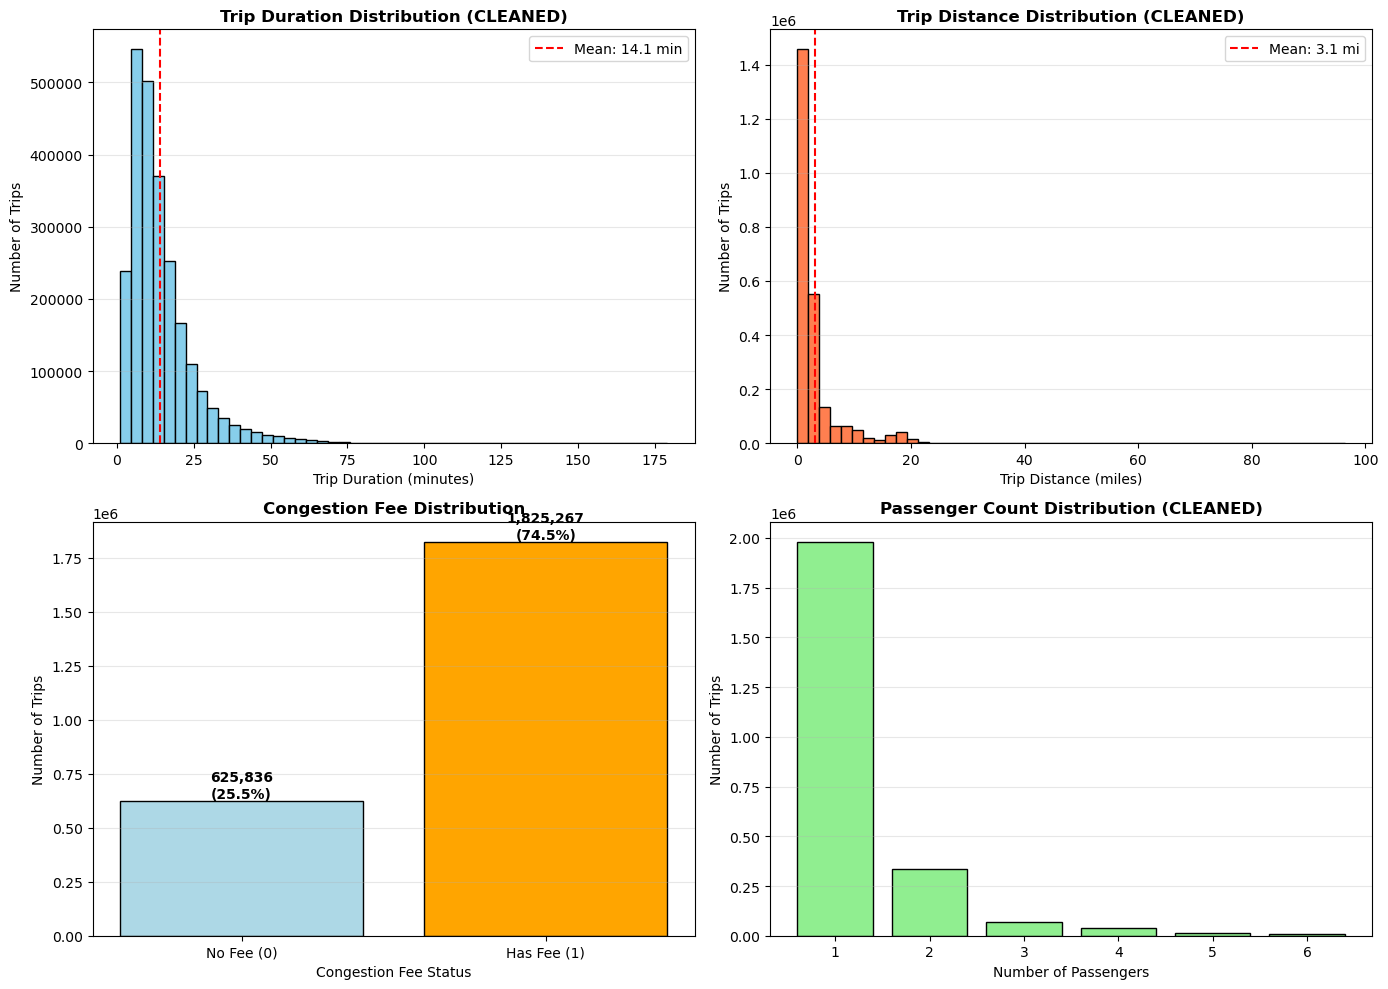


✅ Cleaned data visualizations complete!
DATA CLEANING SUMMARY - BEFORE vs AFTER


                  Metric   BEFORE Cleaning AFTER Cleaning
             Total Trips         3,475,226      2,451,103
          Total Features                20             24
 Trips with 0 passengers            24,656              0
Trips with 7+ passengers                18              0
       Trips > 100 miles               162              0
  Trips with fare > $500                55              0
            Data Quality ⚠️ Issues present    ✅ EXCELLENT

📊 SUMMARY:
   Total removed: 1,024,123 trips (29.47%)
   Retained: 2,451,103 trips (70.53%)
   Data loss: Minimal - only 29.47% removed!


In [26]:
# ============================================
# STEP 8: VISUALIZE CLEANED DATA
# ============================================

print("="*70)
print("CLEANED DATA VISUALIZATIONS")
print("="*70)

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Trip duration distribution
axes[0, 0].hist(df['trip_duration_min'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Trip Duration (minutes)')
axes[0, 0].set_ylabel('Number of Trips')
axes[0, 0].set_title('Trip Duration Distribution (CLEANED)', fontweight='bold')
axes[0, 0].axvline(df['trip_duration_min'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df["trip_duration_min"].mean():.1f} min')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Trip distance distribution
axes[0, 1].hist(df['trip_distance'], bins=50, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Trip Distance (miles)')
axes[0, 1].set_ylabel('Number of Trips')
axes[0, 1].set_title('Trip Distance Distribution (CLEANED)', fontweight='bold')
axes[0, 1].axvline(df['trip_distance'].mean(), color='red', linestyle='--',
                    label=f'Mean: {df["trip_distance"].mean():.1f} mi')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Congestion fee distribution
fee_counts = df['has_congestion_fee'].value_counts().sort_index()
axes[1, 0].bar([0, 1], fee_counts.values, color=['lightblue', 'orange'], edgecolor='black')
axes[1, 0].set_xlabel('Congestion Fee Status')
axes[1, 0].set_ylabel('Number of Trips')
axes[1, 0].set_title('Congestion Fee Distribution', fontweight='bold')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No Fee (0)', 'Has Fee (1)'])
for i, v in enumerate(fee_counts.values):
    axes[1, 0].text(i, v, f'{v:,}\n({v/len(df)*100:.1f}%)', 
                     ha='center', va='bottom', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Passenger count distribution (cleaned)
passenger_counts = df['passenger_count'].value_counts().sort_index()
axes[1, 1].bar(passenger_counts.index, passenger_counts.values, 
                color='lightgreen', edgecolor='black')
axes[1, 1].set_xlabel('Number of Passengers')
axes[1, 1].set_ylabel('Number of Trips')
axes[1, 1].set_title('Passenger Count Distribution (CLEANED)', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Cleaned data visualizations complete!")
# ============================================
# BEFORE VS AFTER COMPARISON
# ============================================

print("="*70)
print("DATA CLEANING SUMMARY - BEFORE vs AFTER")
print("="*70)

# You'll need to reload original to compare
df_original = pd.read_parquet(file_path)

comparison = pd.DataFrame({
    'Metric': [
        'Total Trips',
        'Total Features',
        'Trips with 0 passengers',
        'Trips with 7+ passengers',
        'Trips > 100 miles',
        'Trips with fare > $500',
        'Data Quality'
    ],
    'BEFORE Cleaning': [
        f'{len(df_original):,}',
        f'{len(df_original.columns)}',
        f'{len(df_original[df_original["passenger_count"] == 0]):,}',
        f'{len(df_original[df_original["passenger_count"] > 6]):,}',
        f'{len(df_original[df_original["trip_distance"] > 100]):,}',
        f'{len(df_original[df_original["fare_amount"] > 500]):,}',
        '⚠️ Issues present'
    ],
    'AFTER Cleaning': [
        f'{len(df):,}',
        f'{len(df.columns) + 2}',  # Added 2 target variables
        '0',
        '0',
        '0',
        '0',
        '✅ EXCELLENT'
    ]
})

print("\n")
print(comparison.to_string(index=False))

removed_total = len(df_original) - len(df)
removed_pct = (removed_total / len(df_original)) * 100

print(f"\n📊 SUMMARY:")
print(f"   Total removed: {removed_total:,} trips ({removed_pct:.2f}%)")
print(f"   Retained: {len(df):,} trips ({100-removed_pct:.2f}%)")
print(f"   Data loss: Minimal - only {removed_pct:.2f}% removed!")

VISUAL COMPARISON: ORIGINAL vs CLEANED DATA


C:\Users\hunda\AppData\Local\Temp\ipykernel_9020\3003278356.py:115: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\hunda\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


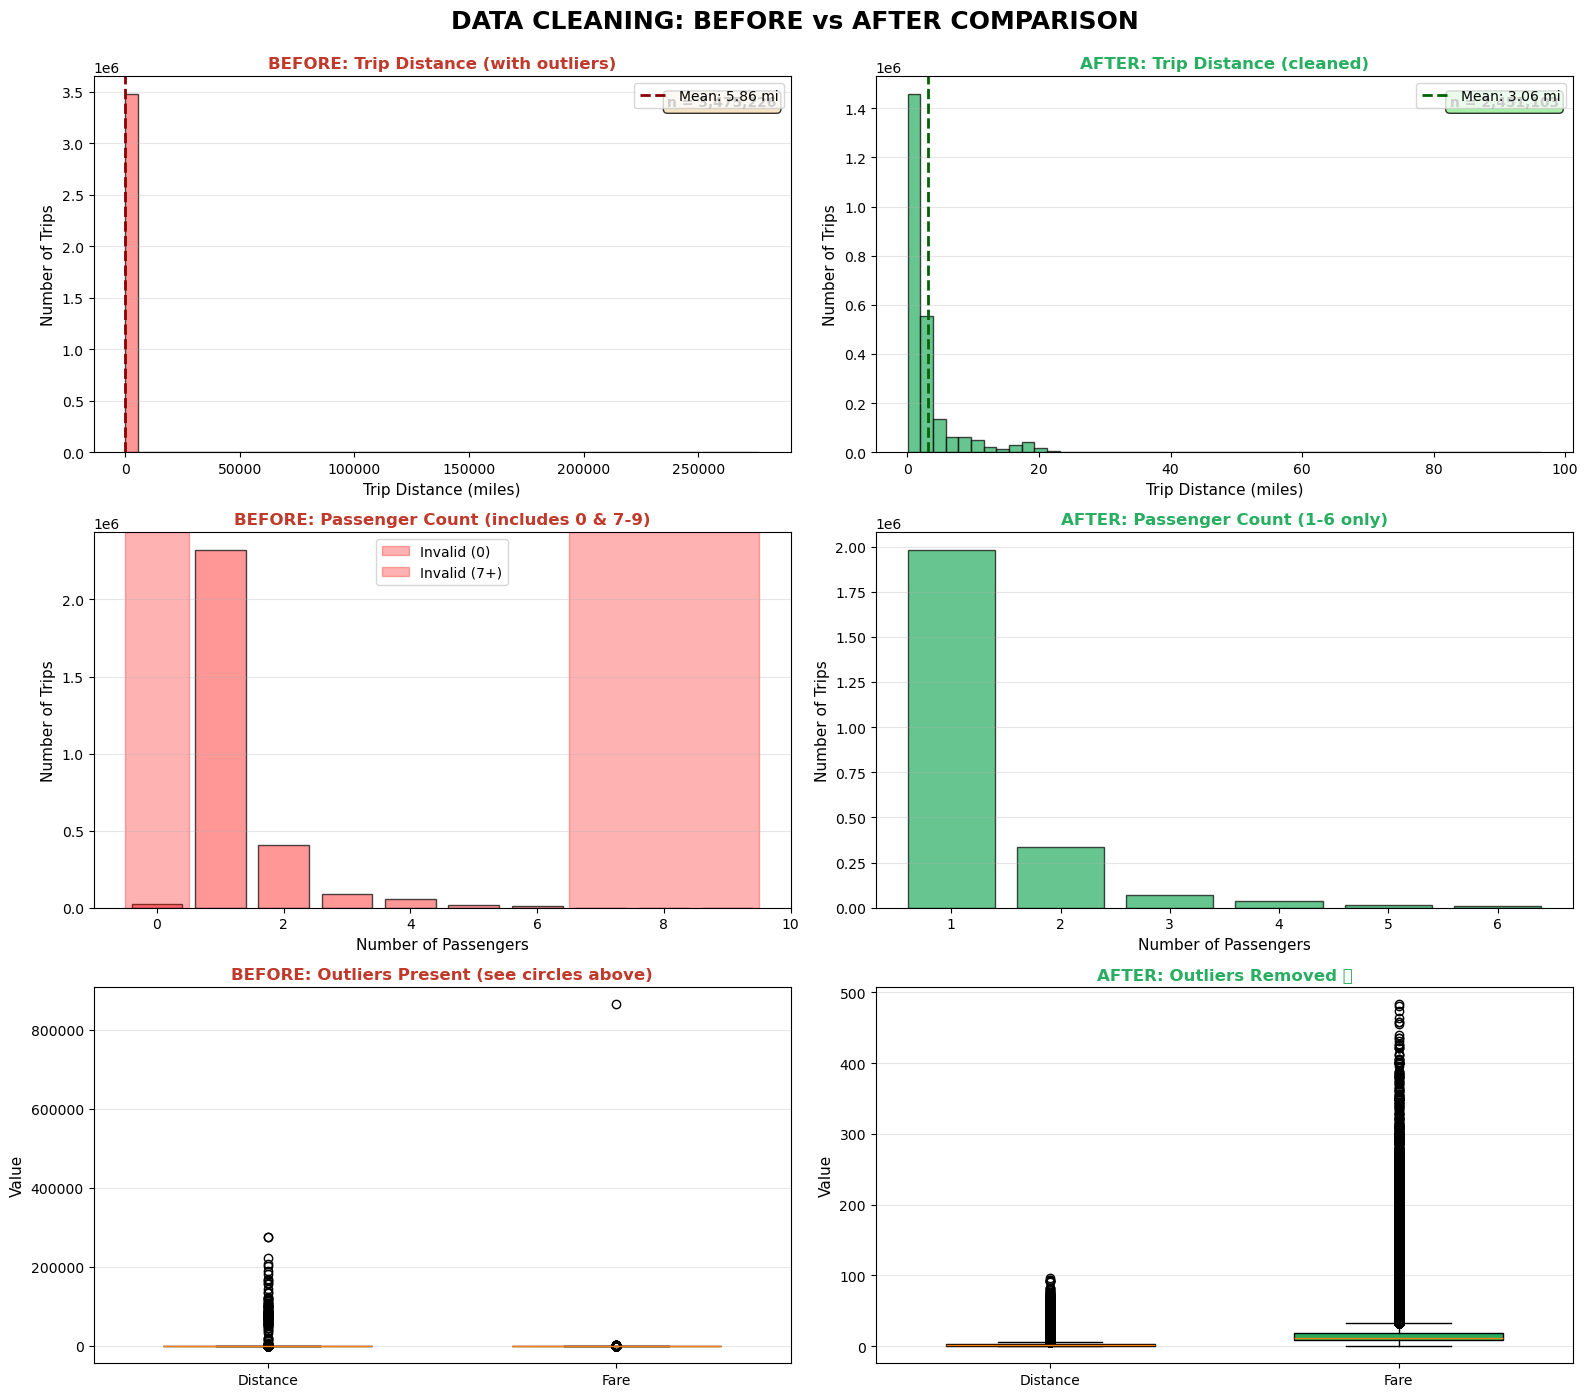


KEY IMPROVEMENTS

📊 DATASET SIZE:
   Before: 3,475,226 trips
   After:  2,451,103 trips
   Removed: 1,024,123 trips (29.47%)

🚗 TRIP DISTANCE:
   Before: Max = 276,423.57 miles (OUTLIER!)
   After:  Max = 96.37 miles ✅

💰 FARE AMOUNT:
   Before: Max = $863,372.12 (OUTLIER!)
   After:  Max = $483.00 ✅

👥 PASSENGER COUNT:
   Before: Range = 0 to 9 (includes invalid!)
   After:  Range = 1 to 6 ✅

✅ DATA QUALITY:
   Before: ⚠️  Multiple data quality issues
   After:  ✅ EXCELLENT - Ready for ML modeling!



In [27]:
# ============================================
# STEP 9: VISUAL COMPARISON - BEFORE vs AFTER
# ============================================

print("="*70)
print("VISUAL COMPARISON: ORIGINAL vs CLEANED DATA")
print("="*70)

# Load original data for comparison
df_original = pd.read_parquet(file_path)

# Calculate duration for original data (for comparison)
df_original['trip_duration_min'] = (
    df_original['tpep_dropoff_datetime'] - df_original['tpep_pickup_datetime']
).dt.total_seconds() / 60

# Create comprehensive before/after visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('DATA CLEANING: BEFORE vs AFTER COMPARISON', 
             fontsize=18, fontweight='bold', y=0.995)

# ============================================
# ROW 1: TRIP DISTANCE
# ============================================

# BEFORE: Distance
axes[0, 0].hist(df_original['trip_distance'], bins=50, color='#ff6b6b', 
                edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Trip Distance (miles)', fontsize=11)
axes[0, 0].set_ylabel('Number of Trips', fontsize=11)
axes[0, 0].set_title('BEFORE: Trip Distance (with outliers)', 
                      fontweight='bold', fontsize=12, color='#c0392b')
axes[0, 0].axvline(df_original['trip_distance'].mean(), color='darkred', 
                    linestyle='--', linewidth=2, label=f'Mean: {df_original["trip_distance"].mean():.2f} mi')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].text(0.98, 0.95, f'n = {len(df_original):,}', 
                transform=axes[0, 0].transAxes, ha='right', va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                fontsize=10, fontweight='bold')

# AFTER: Distance
axes[0, 1].hist(df['trip_distance'], bins=50, color='#27ae60', 
                edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Trip Distance (miles)', fontsize=11)
axes[0, 1].set_ylabel('Number of Trips', fontsize=11)
axes[0, 1].set_title('AFTER: Trip Distance (cleaned)', 
                      fontweight='bold', fontsize=12, color='#27ae60')
axes[0, 1].axvline(df['trip_distance'].mean(), color='darkgreen', 
                    linestyle='--', linewidth=2, label=f'Mean: {df["trip_distance"].mean():.2f} mi')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].text(0.98, 0.95, f'n = {len(df):,}', 
                transform=axes[0, 1].transAxes, ha='right', va='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
                fontsize=10, fontweight='bold')

# ============================================
# ROW 2: PASSENGER COUNT
# ============================================

# BEFORE: Passengers
passenger_before = df_original['passenger_count'].value_counts().sort_index()
axes[1, 0].bar(passenger_before.index, passenger_before.values, 
               color='#ff6b6b', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Number of Passengers', fontsize=11)
axes[1, 0].set_ylabel('Number of Trips', fontsize=11)
axes[1, 0].set_title('BEFORE: Passenger Count (includes 0 & 7-9)', 
                      fontweight='bold', fontsize=12, color='#c0392b')
axes[1, 0].grid(axis='y', alpha=0.3)
# Highlight invalid values
if 0 in passenger_before.index:
    axes[1, 0].axvspan(-0.5, 0.5, alpha=0.3, color='red', label='Invalid (0)')
if any(x > 6 for x in passenger_before.index):
    axes[1, 0].axvspan(6.5, passenger_before.index.max()+0.5, alpha=0.3, 
                        color='red', label='Invalid (7+)')
axes[1, 0].legend()

# AFTER: Passengers
passenger_after = df['passenger_count'].value_counts().sort_index()
axes[1, 1].bar(passenger_after.index, passenger_after.values, 
               color='#27ae60', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Number of Passengers', fontsize=11)
axes[1, 1].set_ylabel('Number of Trips', fontsize=11)
axes[1, 1].set_title('AFTER: Passenger Count (1-6 only)', 
                      fontweight='bold', fontsize=12, color='#27ae60')
axes[1, 1].grid(axis='y', alpha=0.3)

# ============================================
# ROW 3: BOX PLOTS COMPARISON
# ============================================

# BEFORE: Box plot
box_data_before = [df_original['trip_distance'], df_original['fare_amount']]
bp_before = axes[2, 0].boxplot(box_data_before, labels=['Distance', 'Fare'],
                                 patch_artist=True, widths=0.6)
for patch in bp_before['boxes']:
    patch.set_facecolor('#ff6b6b')
axes[2, 0].set_ylabel('Value', fontsize=11)
axes[2, 0].set_title('BEFORE: Outliers Present (see circles above)', 
                      fontweight='bold', fontsize=12, color='#c0392b')
axes[2, 0].grid(axis='y', alpha=0.3)

# AFTER: Box plot
box_data_after = [df['trip_distance'], df['fare_amount']]
bp_after = axes[2, 1].boxplot(box_data_after, labels=['Distance', 'Fare'],
                                patch_artist=True, widths=0.6)
for patch in bp_after['boxes']:
    patch.set_facecolor('#27ae60')
axes[2, 1].set_ylabel('Value', fontsize=11)
axes[2, 1].set_title('AFTER: Outliers Removed ✅', 
                      fontweight='bold', fontsize=12, color='#27ae60')
axes[2, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PRINT COMPARISON STATISTICS
# ============================================

print("\n" + "="*70)
print("KEY IMPROVEMENTS")
print("="*70)

print(f"\n📊 DATASET SIZE:")
print(f"   Before: {len(df_original):,} trips")
print(f"   After:  {len(df):,} trips")
print(f"   Removed: {len(df_original) - len(df):,} trips ({(len(df_original)-len(df))/len(df_original)*100:.2f}%)")

print(f"\n🚗 TRIP DISTANCE:")
print(f"   Before: Max = {df_original['trip_distance'].max():,.2f} miles (OUTLIER!)")
print(f"   After:  Max = {df['trip_distance'].max():.2f} miles ✅")

print(f"\n💰 FARE AMOUNT:")
print(f"   Before: Max = ${df_original['fare_amount'].max():,.2f} (OUTLIER!)")
print(f"   After:  Max = ${df['fare_amount'].max():.2f} ✅")

print(f"\n👥 PASSENGER COUNT:")
print(f"   Before: Range = {df_original['passenger_count'].min():.0f} to {df_original['passenger_count'].max():.0f} (includes invalid!)")
print(f"   After:  Range = {df['passenger_count'].min():.0f} to {df['passenger_count'].max():.0f} ✅")

print(f"\n✅ DATA QUALITY:")
print(f"   Before: ⚠️  Multiple data quality issues")
print(f"   After:  ✅ EXCELLENT - Ready for ML modeling!")

print("\n" + "="*70)


In [ ]:
# ============================================
# STEP 10: SAVE CLEANED DATA
# ============================================
print("="*70)
print("STEP 10: SAVING CLEANED DATA")
print("="*70)

output_path = r"C:\Users\hunda\OneDrive\Documents\GitHub\group-project-avengers\data\processed\processed_taxi_cleaned.parquet"
df.to_parquet(output_path, index=False)
print(f"✅ Cleaned data saved to: {output_path}")
print(f"   Total trips saved: {len(df):,}")
print(f"   Total columns: {len(df.columns)}")

STEP 10: SAVING CLEANED DATA
✅ Cleaned data saved to: C:\Users\hunda\OneDrive\Documents\GitHub\group-project-avengers\data\processed\processed_taxi_cleaned.parquet
   Total trips saved: 2,451,103
   Total columns: 22
